# CMPE 257 - Assignment 2 Cluster With GMM

Student Name : Darshini Venkatesha Murthy Nag  
Team Name : Code Wizards  
SJSU ID : 016668951  

Objective: To offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.

Dataset: California Real Estate dataset available inside shared drive data folder https://drive.google.com/drive/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-?usp=drive_link

In [ ]:
## Standard Imports
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import seaborn as sns

# Data Narrative

Main dataset is downloaded from redfin and is uploaded in the shared drive  : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapped data is obtained from the following websites

Walk Score is from :  https://www.walkscore.com/

Total crime rate , Property crime rate: https://247wallst.com/state/crime-in-california/

School Rating : https://www.niche.com/places-to-live/z/95134/ <br>

Final dataset is located at: https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-


The dataset contains the following columns

**SALE TYPE**: Indicates the type of sales transaction. This includes categories such as new listings, resale, foreclosure, etc.

**SOLD DATE**: The date on which the property was sold.

**PROPERTY TYPE**: This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS**: The address where the property is located.

**CITY**: The city where the property is located.

**STATE OR PROVINCE**: The state or province where the property is located.

**ZIP_CODE**: Indicates the zip code of the property's location.

**PRICE**: Indicates the selling price of the property.

**BEDS**: Indicates the number of bedrooms in the property.

**BATHS**: The number of bathrooms in the property.

**SOURCE**: The source from where the data was obtained.

**MLS#**: The Multiple Listing Service number, serves as an identifier for the property listing.

**FAVORITE**: Indicates whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED**: Indicates the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE**: provides the geographical coordinates of the property.

**WALK_SCORE**: A score indicating the walkability of the neighborhood where the property is located.

**PROPERTY_CRIME**: Indicates the rate of property crimes in the city where the where the property is located.

**TOTAL_CRIME**: Indicates the rate of total crimes in the city where the where the property is located.

**SCHOOL_RANKING**: Provides information about the ranking of schools nearby the property

# Clustering using Gaussian Mixture Models (GMM)

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# id of the dataset csv file in the google drive shared folder

id='18cvJIqzfhTSrV53TJZruhYEVNO47b_b5'
print (id)

18cvJIqzfhTSrV53TJZruhYEVNO47b_b5


In [ ]:
## Loading Dataset

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final.csv')
data = pd.read_csv('RF_Housingdata_final.csv')
dataCopy = data;
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038381,N,Y,37.817373,-122.254688,84,6421,7692,712.0
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038260,N,Y,37.835305,-122.221226,30,6421,7692,582.0
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038165,N,Y,37.814753,-122.255872,84,6421,7692,712.0
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 31 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SOLD DATE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP_CODE,4042.0,9.446043e+04,1.396650e+03,9131.000000,94112.000000,9.453800e+04,9.461100e+04,9.514800e+04
PRICE,4042.0,1.818371e+06,2.344222e+06,39995.000000,799000.000000,1.279495e+06,1.950000e+06,4.200000e+07
BEDS,3901.0,3.150987e+00,2.237906e+00,0.000000,2.000000,3.000000e+00,4.000000e+00,5.600000e+01
BATHS,3807.0,2.497505e+00,1.818428e+00,0.500000,2.000000,2.000000e+00,3.000000e+00,4.950000e+01
SQUARE FEET,3854.0,2.177032e+03,2.371299e+03,254.000000,1140.250000,1.590000e+03,2.421500e+03,5.300000e+04
LOT SIZE,3173.0,1.604672e+05,5.347448e+06,436.000000,3000.000000,5.605000e+03,1.000100e+04,2.688088e+08
YEAR BUILT,3672.0,1.964365e+03,3.758494e+01,1870.000000,1931.000000,1.965000e+03,1.997000e+03,2.024000e+03
DAYS ON MARKET,3895.0,5.614326e+01,8.359356e+01,1.000000,8.000000,2.800000e+01,7.100000e+01,1.040000e+03
$/SQUARE FEET,3854.0,8.502976e+02,4.527999e+02,85.000000,577.000000,7.700000e+02,1.025000e+03,6.851000e+03


In [ ]:
# Data Wrangling and Preparation

# Drop column sold date as it doesn't have any values
data.drop(axis=1, labels='SOLD DATE', inplace=True)

# extract the required features and standardize
features = data[['LATITUDE', 'LONGITUDE', 'PROPERTY_CRIME']].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Fit Gaussian Mixture Model to the data

n_components_range = range(2, 11)

# Initialize variables to store the best silhouette score and corresponding number of components
best_silhouette_score = -1
best_n_components = -1

# Loop through different values of n_components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    cluster_labels = gmm.fit_predict(features_scaled)

    silhouette_avg = silhouette_score(features_scaled, cluster_labels)

    # Check if this is the best silhouette score so far
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_components = n_components

print(f"Best number of components: {best_n_components}")

gmm = GaussianMixture(n_components=best_n_components, random_state=0)
cluster_labels = gmm.fit_predict(features_scaled)

Best number of components: 2


In [ ]:
# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

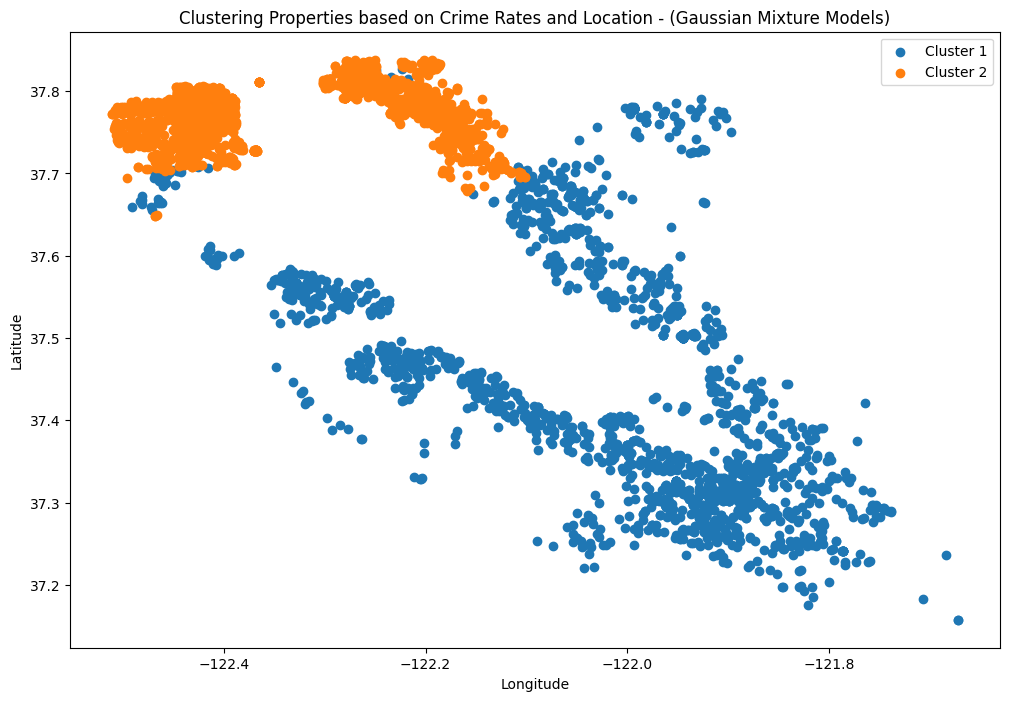

In [ ]:
# Create a scatter plot for latitude vs. longitude with colors representing clusters
plt.figure(figsize=(12, 8))
for cluster in range(best_n_components):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], label=f'Cluster {cluster + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Properties based on Crime Rates and Location - (Gaussian Mixture Models)')
plt.legend()

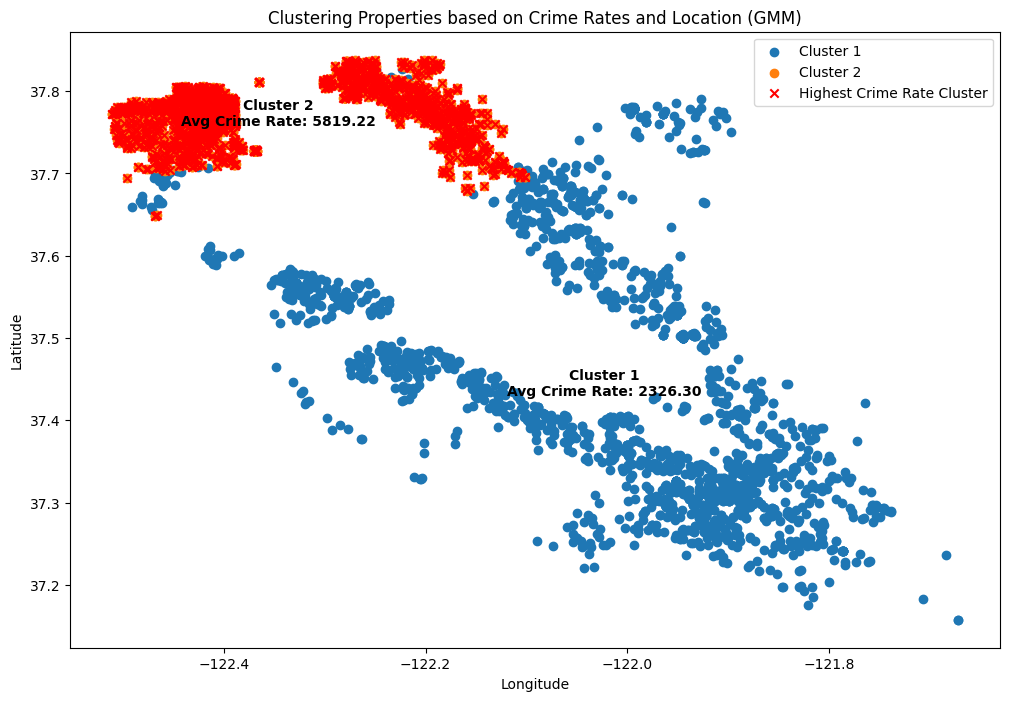

Cluster 2 has the highest average crime rate: 5819.22


In [ ]:
# Calculate average crime rate for each cluster
average_crime_rates = []
for cluster in range(best_n_components):
    cluster_data = data[data['Cluster'] == cluster]
    avg_crime_rate = cluster_data['PROPERTY_CRIME'].mean()
    average_crime_rates.append(avg_crime_rate)

# Find the cluster with the highest average crime rate
most_crime_cluster = np.argmax(average_crime_rates)
highest_avg_crime_rate = average_crime_rates[most_crime_cluster]

# Create a scatter plot for latitude vs. longitude with colors representing clusters
plt.figure(figsize=(12, 8))
for cluster in range(best_n_components):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], label=f'Cluster {cluster + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Properties based on Crime Rates and Location (GMM)')

# Annotate the cluster with the highest average crime rate
cluster_data = data[data['Cluster'] == most_crime_cluster]
plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], color='red', marker='x', label=f'Highest Crime Rate Cluster')

# Display crime rates in each cluster
for cluster in range(best_n_components):
    cluster_data = data[data['Cluster'] == cluster]
    avg_crime_rate = cluster_data['PROPERTY_CRIME'].mean()
    plt.annotate(f'Cluster {cluster + 1}\nAvg Crime Rate: {avg_crime_rate:.2f}',
                 (cluster_data['LONGITUDE'].mean(), cluster_data['LATITUDE'].mean()),
                 fontsize=10, color='black', weight='bold', ha='center', va='center')

plt.legend()
plt.show()

print(f"Cluster {most_crime_cluster + 1} has the highest average crime rate: {highest_avg_crime_rate:.2f}")

**From the above graphs using GMM we can visualize that houses located in Cluster 2 have the highest average crime rate of 5819.22**

# Clustering Using K-Means

In [ ]:
# Determine the optimal number of clusters (K) using the elbow method and silhouette score method
wcss = []

max_k = 10
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

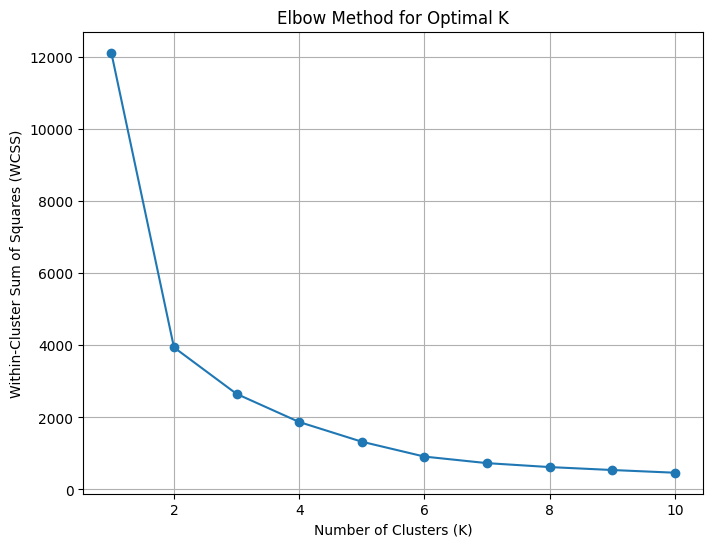

In [ ]:
# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Silhouette Score for different values of K
silhouette_scores = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

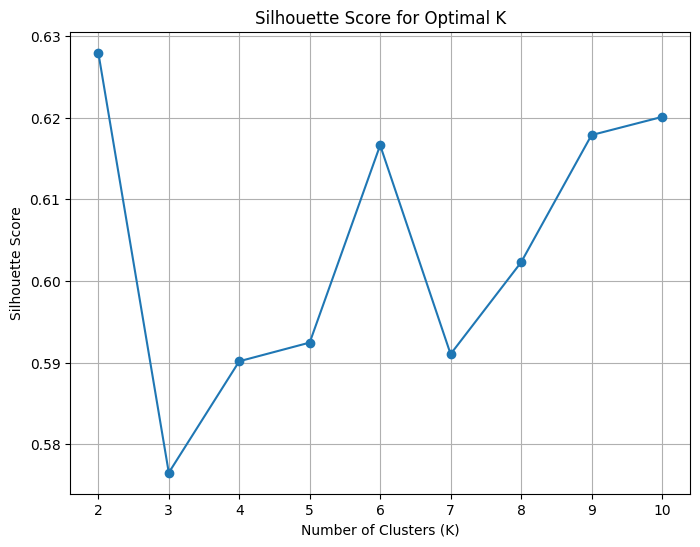

In [ ]:
# Plot the Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid(True)
plt.show()

 **From the above elbow method and silhouette score method we can clearly identify that optimal k value is 2 as 2 has the highest silhouette score**

In [ ]:
optimal_k = 2

# Perform K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add the cluster labels to the original data
data['Cluster'] = cluster_labels_kmeans

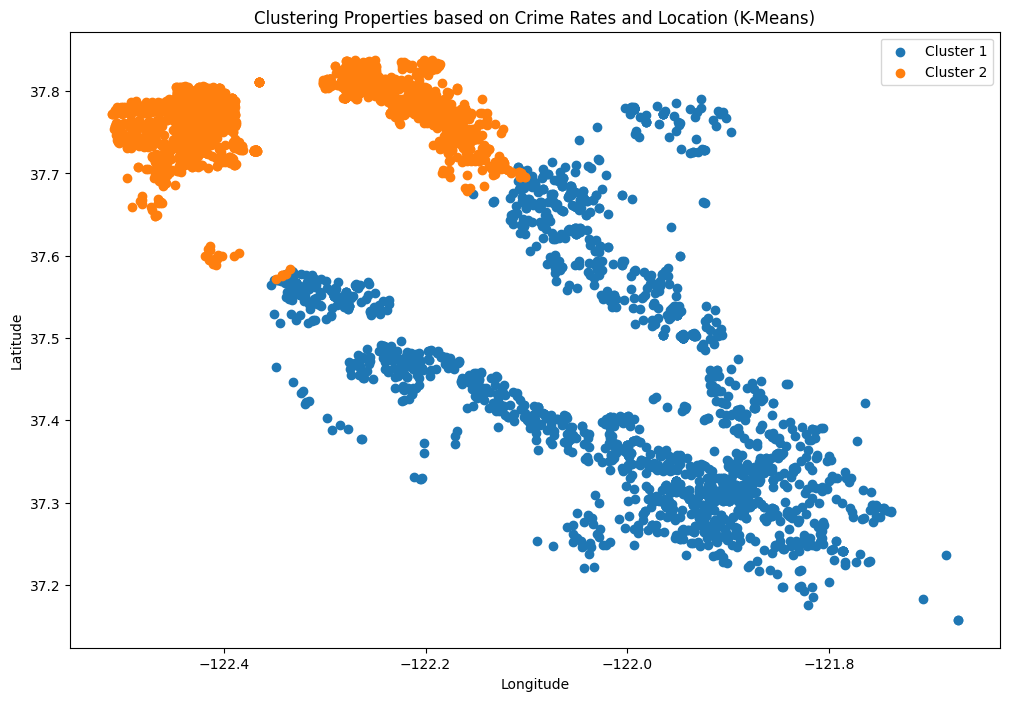

In [ ]:
# Create a scatter plot for latitude vs. longitude with colors representing clusters
plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], label=f'Cluster {cluster + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Properties based on Crime Rates and Location (K-Means)')
plt.legend()
plt.show()

# Conclusion

From the above results it is clear that locations in Cluster 2 has the highest crime rate whereas Cluster 1 has lowest Crime Rates. This infomation can be helpful to provide potential buyers or renters with a sense of the safety and security of a neighborhood.

# Comparsion of K-Means and GMM Clustering

As we can see K-Means Clustering, GMM clustering are giving similar kind of results, and we can somewhat clearly see 2 clusters. Both methods are correctly able to cluster locations based on crime rates helping the investors or homebuyers in identifying safe and unsafe neighborhoods.


# References

Gaussian Mixture Models : https://scikit-learn.org/stable/modules/mixture.html

Silhouette Score Analysis : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://www.youtube.com/watch?v=FGXkbawTHRQ

Clusters Comparison : https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html